## Background : 

A US-based housing company named Surprise Housing has  decided to enter the Australian market. The company uses data analytics to  purchase houses at a price below their actual values and flip them on at a  higher price. For the same purpose, the company has collected a data set  from the sale of houses in Australia.


## Business Goal : 

You are required to model the price of houses with the available independent variables. This  model will then be used by the management to understand how exactly the prices vary with the variables.  They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns.  Further, the model will be a good way for management to understand the pricing dynamics of a new market.


# 1. Load and Understand Data


Let's first have a look at the dataset and understand the size, attribute names etc.

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import StandardScaler

%matplotlib inline

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [235]:
# reading the dataset
house = pd.read_csv("train.csv")
house.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [26]:
house.shape

(1460, 81)

In [27]:
# summary of the dataset: 1460 rows, 81 columns
print(house.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [28]:
#Some statistical insights on numerical columns
house.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [236]:
#dropping ID column
house.drop(['Id'], axis=1, inplace=True)
house.shape

(1460, 80)

In [30]:
#Some statistical insights on numerical columns
house.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315  ...   
std      30.202904     20.645407   181.066207   456.098091   161.319273  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000  ...   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000  ...   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 37 columns]

__we have 79 independent features and SalePrice is the target variable__

# 2. Data Inspection and Preparation



#### Checking for Missing Values

In [43]:
#check missing percentage
percent_missing = house.isnull().sum() * 100 / len(house)
missing_value_df = pd.DataFrame({'column_name': house.columns,
                                 'percent_missing': percent_missing})

In [52]:
missing_value_df.sort_values('percent_missing', inplace=True, ascending=False)
missing_value_df.head(25)

column_name  percent_missing
PoolQC              PoolQC        99.520548
MiscFeature    MiscFeature        96.301370
Alley                Alley        93.767123
Fence                Fence        80.753425
FireplaceQu    FireplaceQu        47.260274
LotFrontage    LotFrontage        17.739726
GarageType      GarageType         5.547945
GarageCond      GarageCond         5.547945
GarageYrBlt    GarageYrBlt         5.547945
GarageFinish  GarageFinish         5.547945
GarageQual      GarageQual         5.547945
BsmtFinType2  BsmtFinType2         2.602740
BsmtExposure  BsmtExposure         2.602740
BsmtCond          BsmtCond         2.534247
BsmtFinType1  BsmtFinType1         2.534247
BsmtQual          BsmtQual         2.534247
MasVnrType      MasVnrType         0.547945
MasVnrArea      MasVnrArea         0.547945
Electrical      Electrical         0.068493
ScreenPorch    ScreenPorch         0.000000
MiscVal            MiscVal         0.000000
BsmtHalfBath  BsmtHalfBath         0.000000
BsmtFullBath  BsmtFullBath         0.000000
LowQualFinSF  LowQualFinSF         0.000000
GarageCars      GarageCars         0.000000

Looking above, we have sorted columns in accordance with their percentage of missing values. We will drop the columns which has Missing values of 40% or more. We will work on the rest of the columns to treat missing values below

In [237]:
#'PoolQC', 'MiscFeature', 'Alley', 'FireplaceQu	' and 'Fence' columns contain highest no of missing values. Let's drop the columns
house = house.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis = 1)

### Data Cleaning

In [238]:
#few categorical columns has NA, replacing them accordingly
house['GarageType'] = house['GarageType'].replace(np.nan, 'No Garage')
house['GarageFinish'] = house['GarageFinish'].replace(np.nan, 'No Garage')
house['GarageCond'] = house['GarageCond'].replace(np.nan, 'No Garage')
house['GarageQual'] = house['GarageQual'].replace(np.nan, 'No Garage')
house['MasVnrType'] = house['MasVnrType'].replace(np.nan, 'None') # assuming NA as None
house['Electrical'] = house['Electrical'].replace(np.nan, 'SBrkr') # replacing NA with SBrkr(mode:most repeated category)
house['BsmtFinType2'] = house['BsmtFinType2'].replace(np.nan, 'No Basement')
house['BsmtExposure'] = house['BsmtExposure'].replace(np.nan, 'No Basement')
house['BsmtCond'] = house['BsmtCond'].replace(np.nan, 'No Basement')
house['BsmtFinType1'] = house['BsmtFinType1'].replace(np.nan, 'No Basement')
house['BsmtQual'] = house['BsmtQual'].replace(np.nan, 'No Basement')

## Missing Value Imputation

In [239]:
#imputing missing values of numerical columns with (statistical method(Median if it has outliers or mean)
house.loc[:,'LotFrontage'] = house.loc[:, 'LotFrontage'].fillna(house['LotFrontage'].median())
house.loc[:,'MasVnrArea'] = house.loc[:, 'MasVnrArea'].fillna(house['MasVnrArea'].median())
house.loc[:,'GarageYrBlt'] = house.loc[:, 'GarageYrBlt'].fillna(house['GarageYrBlt'].mean())

In [71]:
#verifying if we treated all columns with missing values, no more missing values in data
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

# 3. EDA

To perform linear regression, the (numeric) target variable should be linearly related to at least one another numeric variable. Let's see whether that's true in this case.


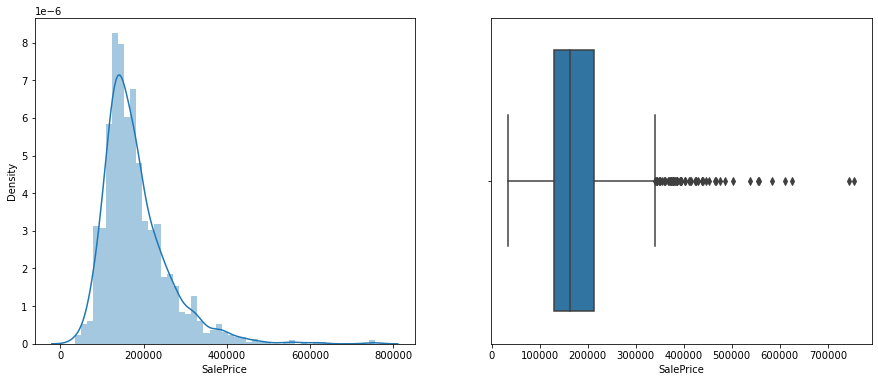

In [80]:
# checking target variable: price of house
f, axes = plt.subplots(1, 2, figsize=(15,6))
sns.distplot(house['SalePrice'], ax=axes[0])
sns.boxplot(house['SalePrice'], ax=axes[1])
plt.show()

In [ ]:
# correlation matrix
cor = cars_numeric.corr()
cor

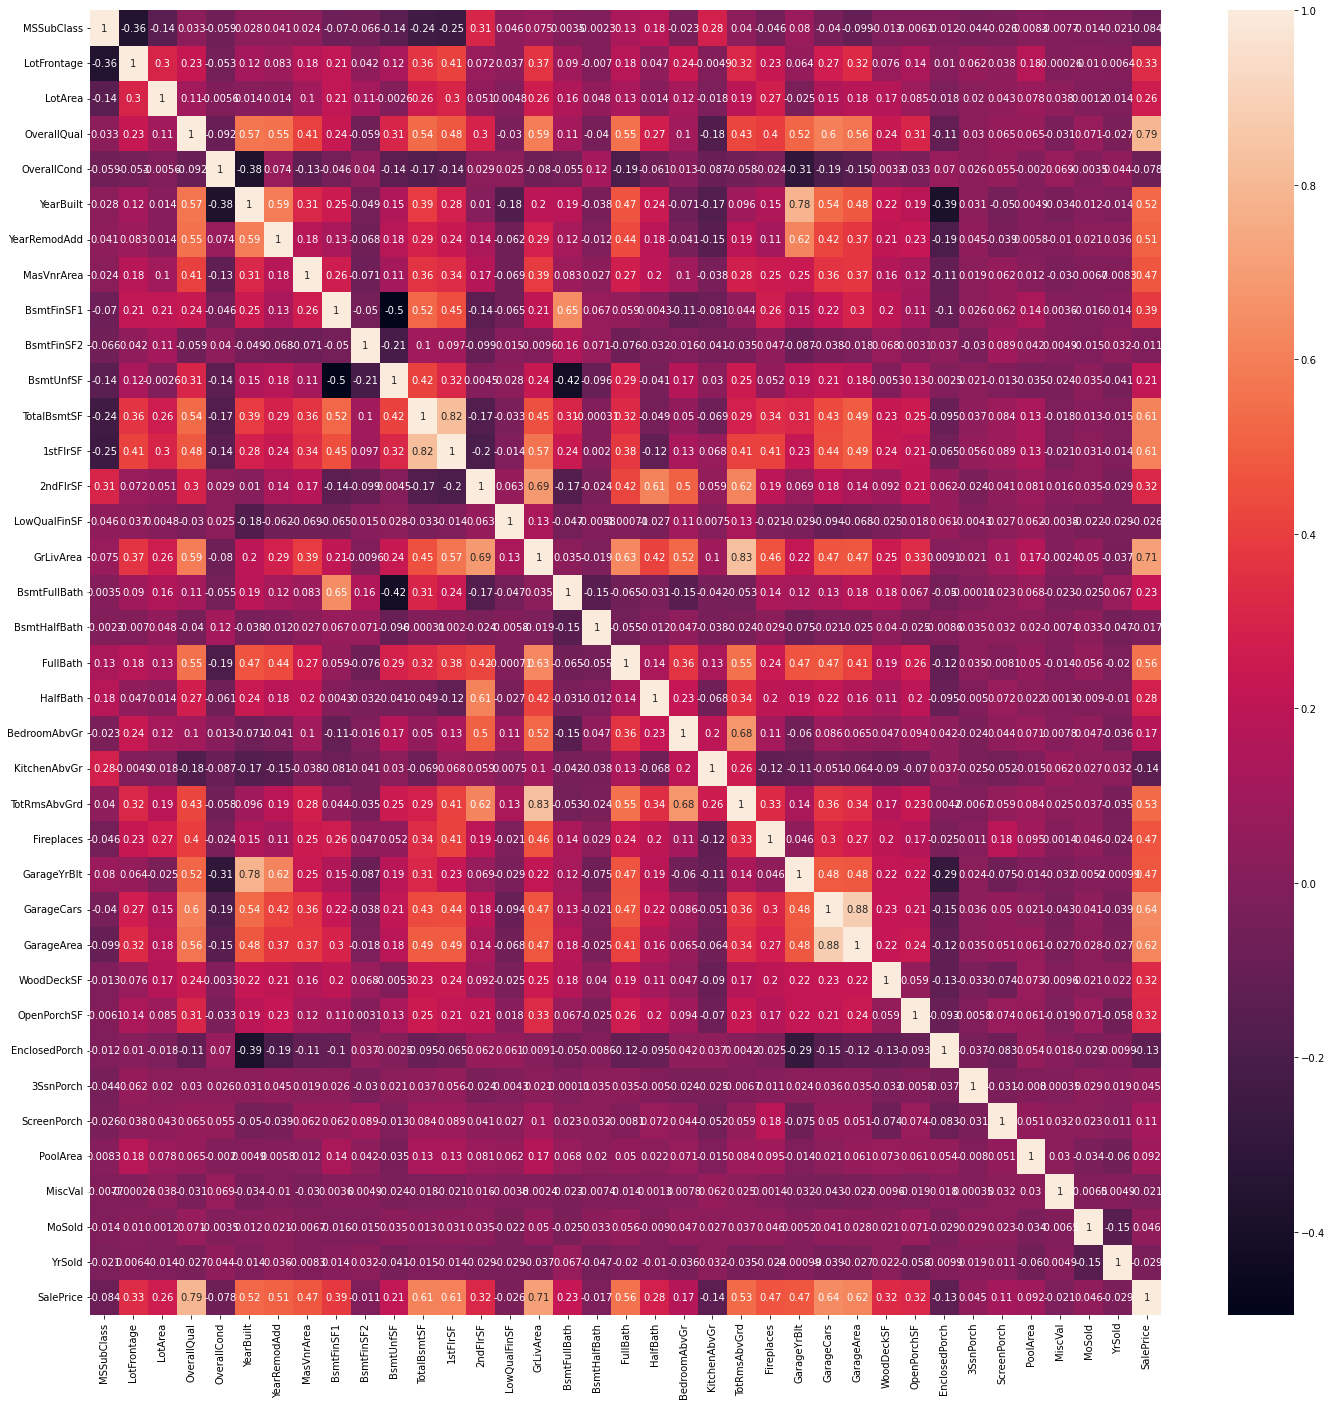

In [75]:
# plotting correlations on a heatmap

plt.figure(figsize=(24, 24))
sns.heatmap(house.corr(), annot=True)
plt.show()

The heatmap shows some useful insights:

Correlation of SalePrice with independent variables:

SalePrice is highly (positively) correlated with OverallQual(0.79), GrLivArea(0.71), Garage Cars(0.64), Garage Area(0.62), TotalBsmtSF(0.61), 1st Foor SF(0.61), Fullbath(0.56), TotRmsAbvGrd(0.53) and  Year Built(0.52)

SalePrice is negatively correlated to KitchenAbvGR, EnclosedPorch


We'll first subset the list of all (independent) numeric variables, and then make a pairwise plot.

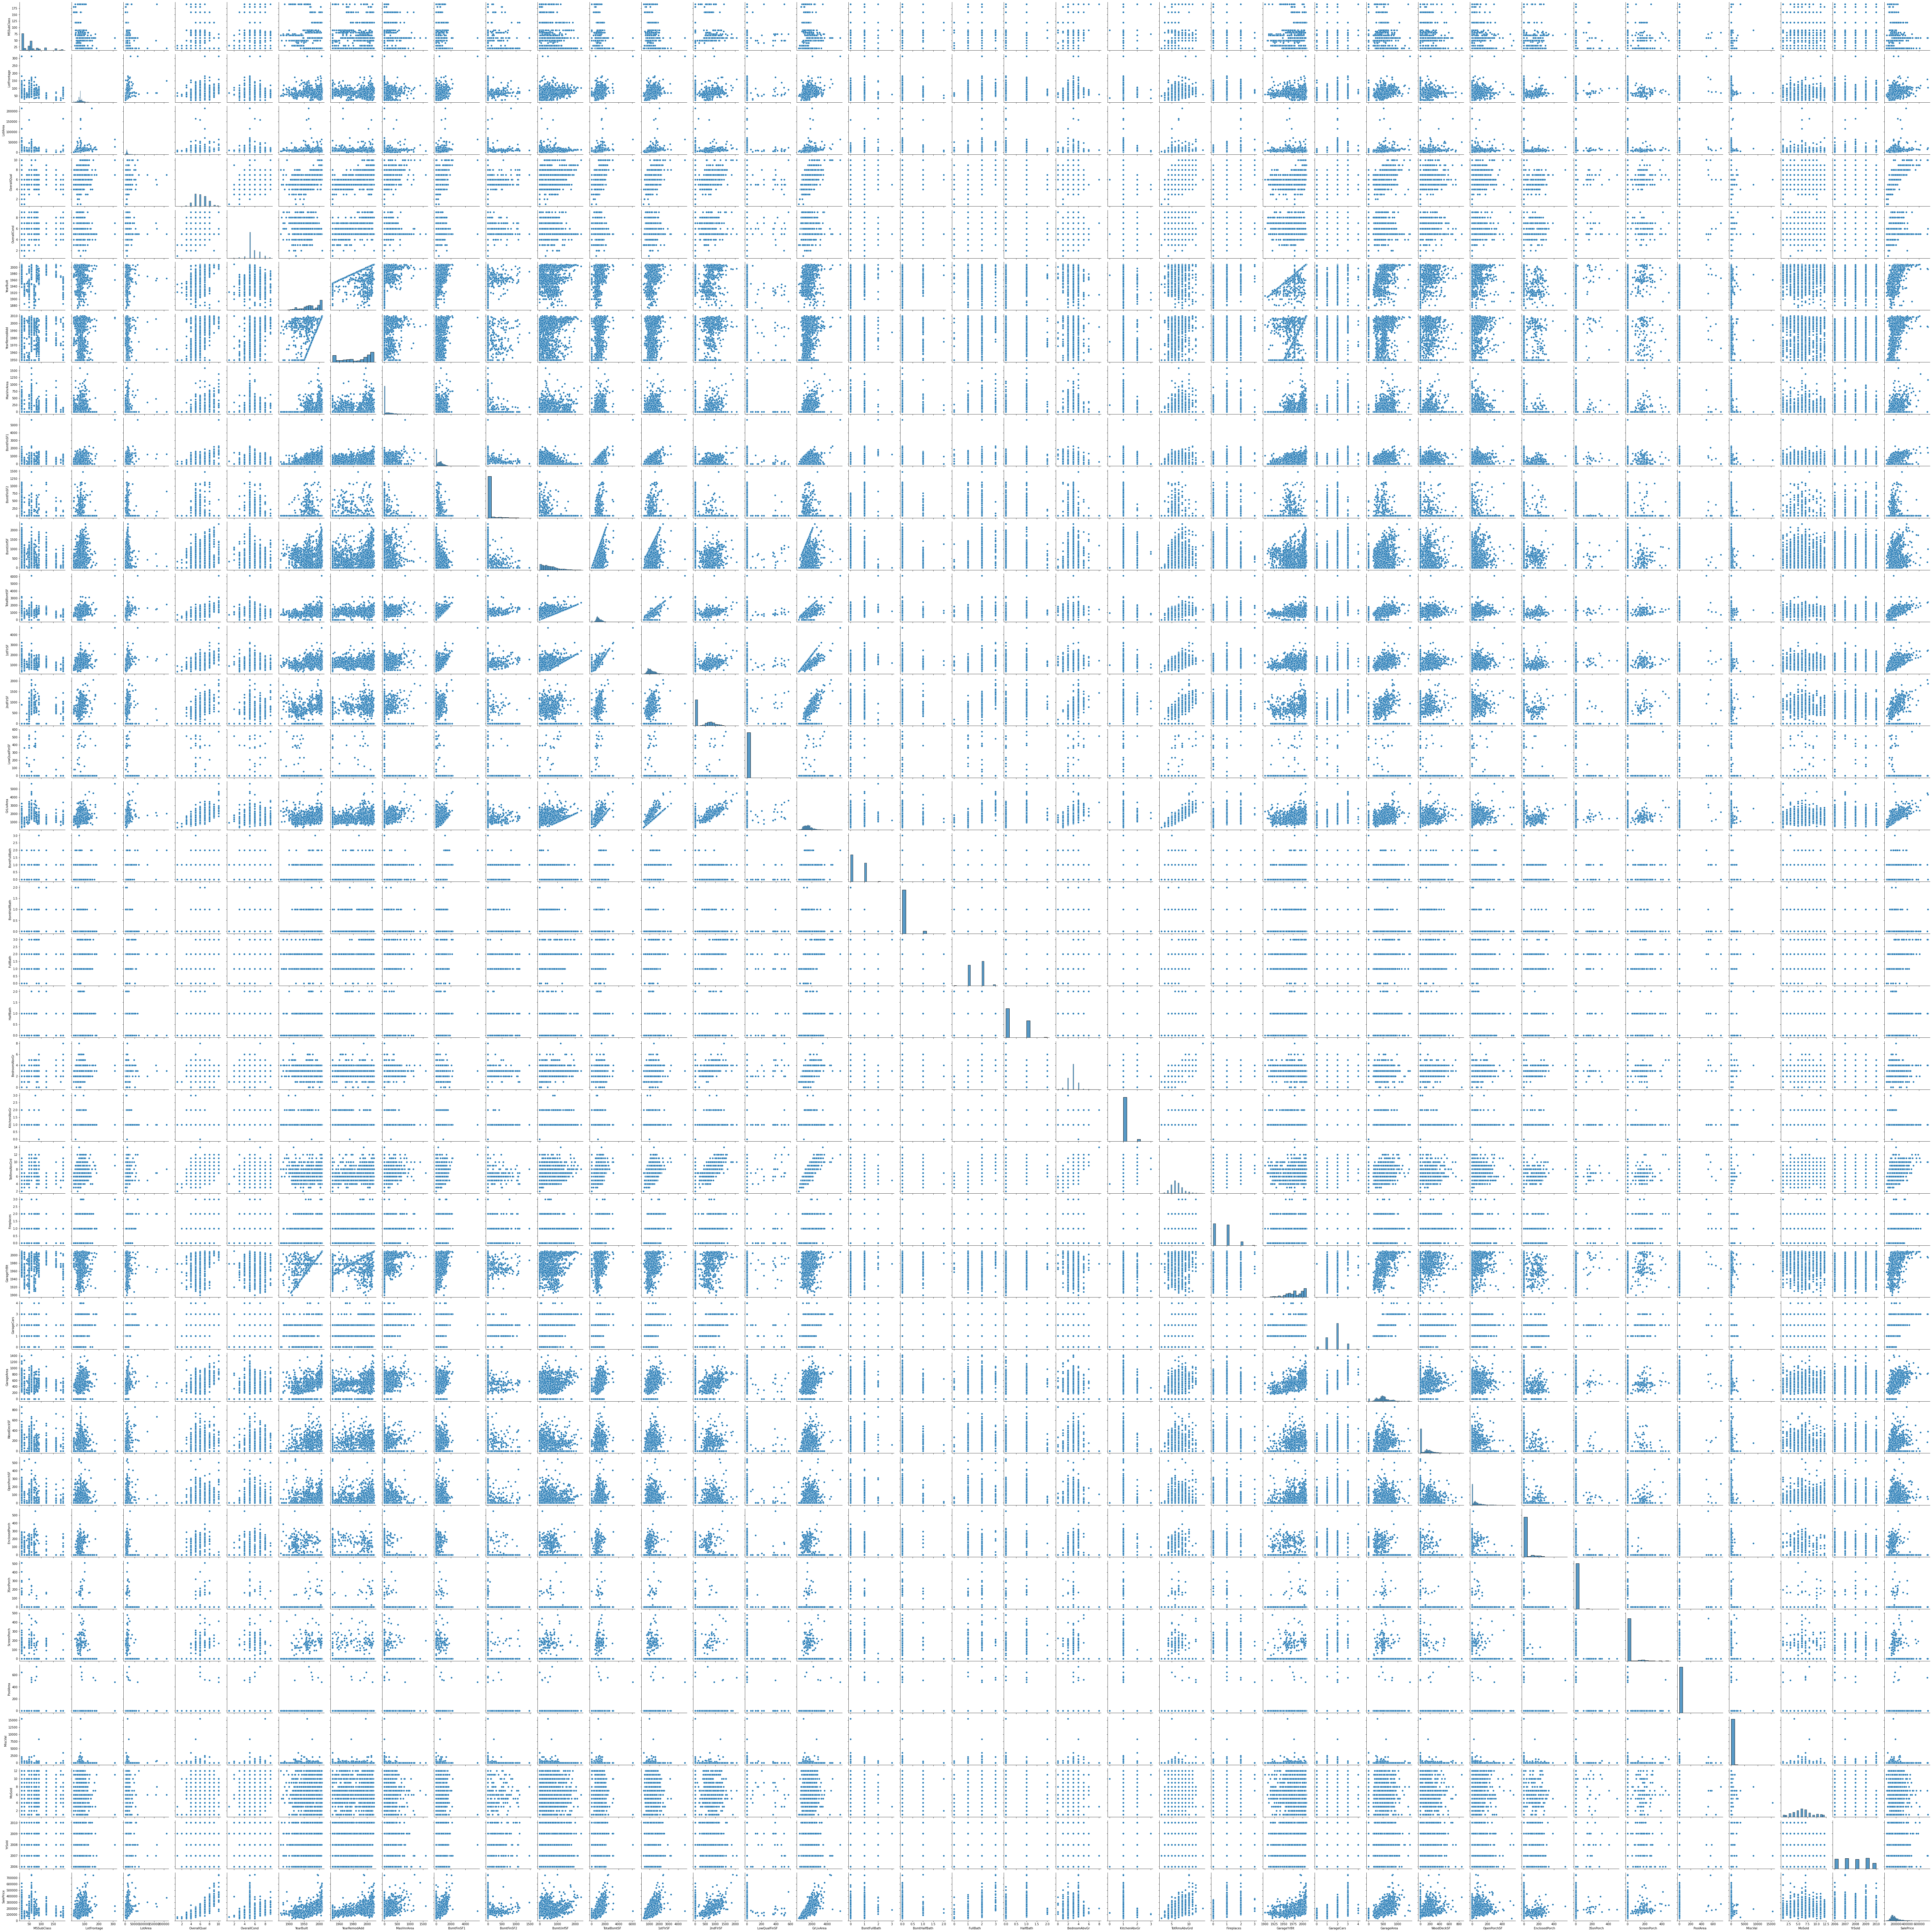

In [81]:
sns.pairplot(house[list(house)])

__Visualising some numerical variables__

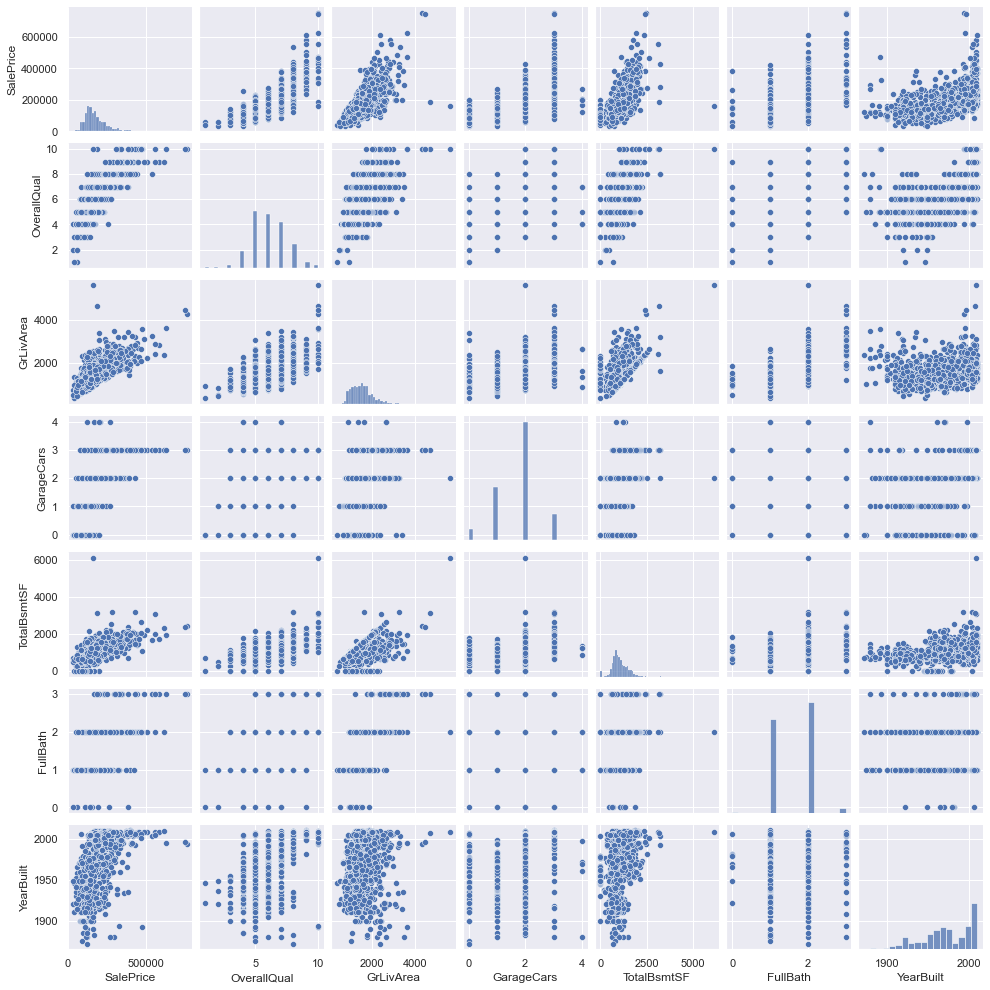

In [83]:
#important numeric variables with high correlation 
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(house[cols],height = 2)
plt.show()

__Categorical & continuous - Overall Quality Vs Sale Price__

Text(0.5, 1.0, 'Overall Quality vs SalePrice')

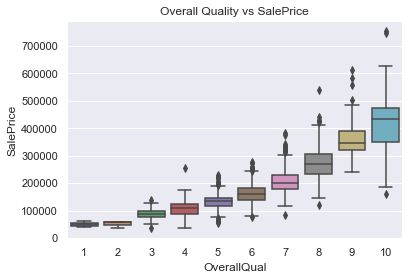

In [94]:
sns.boxplot(x='OverallQual', y='SalePrice', data=house)
plt.title("Overall Quality vs SalePrice")

We see that as OverallQual increases, the SalePrice also increases.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Gr LivArea vs SalePrice')

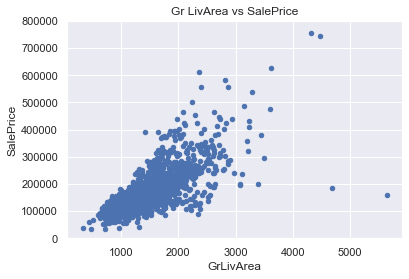

In [93]:
data = pd.concat([house['SalePrice'], house['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000));
plt.title('Gr LivArea vs SalePrice')

GrLivArea: with more ground living area square feet, price is higher

Text(0.5, 1.0, 'Size of Garage with car capacity vs SalePrice')

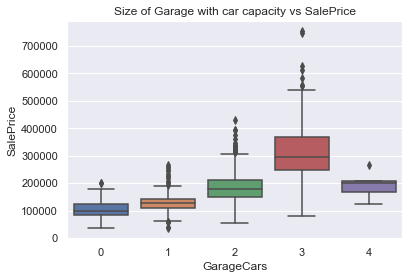

In [96]:
sns.boxplot(x='GarageCars', y='SalePrice', data=house)
plt.title("Size of Garage with car capacity vs SalePrice")

price is higher for garage with 3 cars

__Visualising some categorical variables__

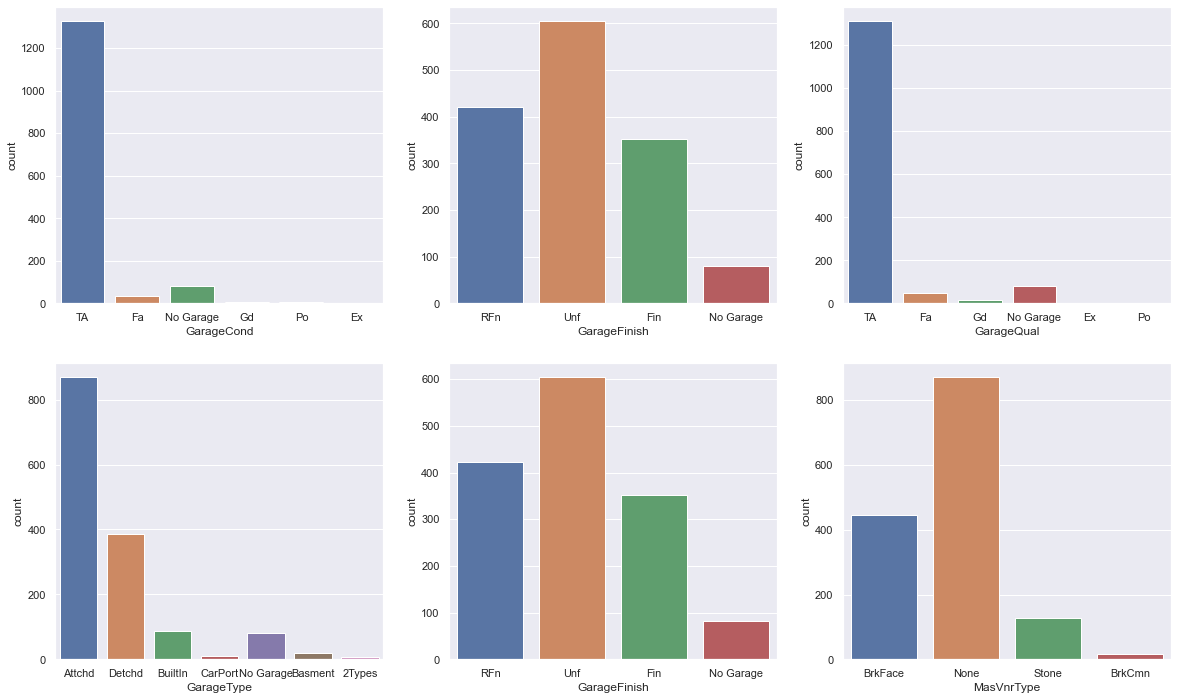

In [87]:
#Visualising the variables wih missing values

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'GarageCond', data = house)

plt.subplot(2,3,2)
sns.countplot(x = 'GarageFinish',  data = house)

plt.subplot(2,3,3)
sns.countplot(x = 'GarageQual', data = house)
plt.subplot(2,3,4)
sns.countplot(x = 'GarageType', data = house)
plt.subplot(2,3,5)
sns.countplot(x = 'GarageFinish',  data = house)
plt.subplot(2,3,6)
sns.countplot(x = 'MasVnrType', data = house)
plt.show()

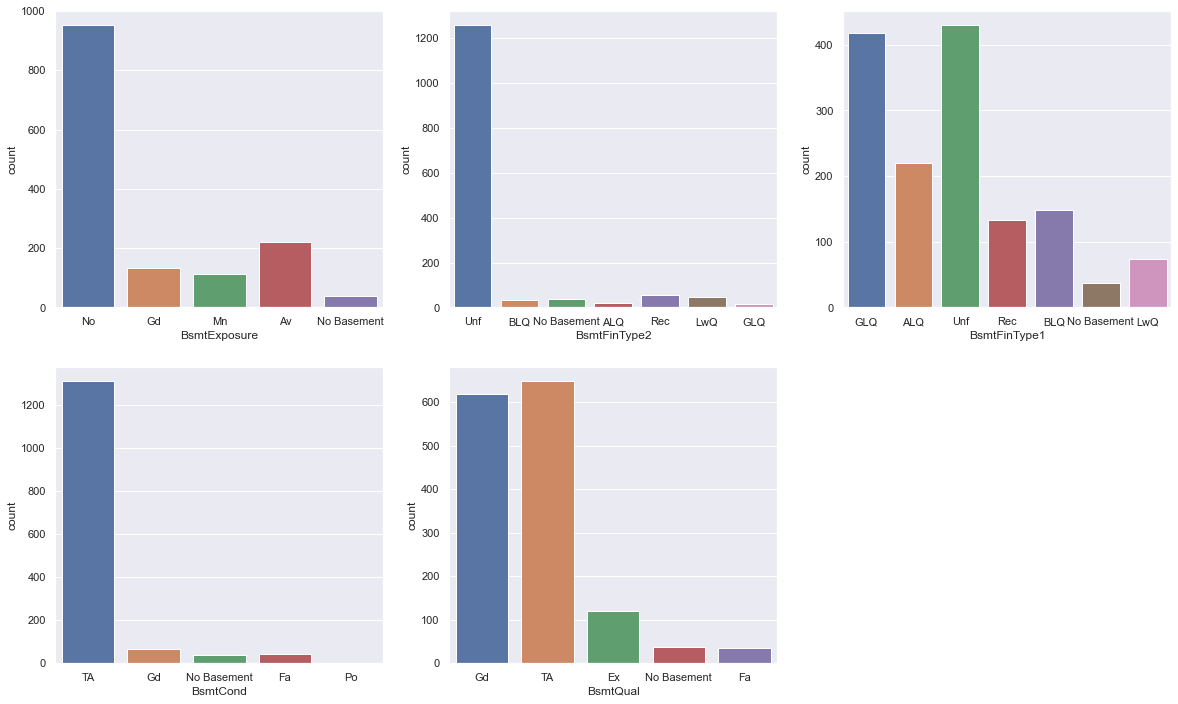

In [88]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'BsmtExposure', data = house)

plt.subplot(2,3,2)
sns.countplot(x = 'BsmtFinType2',  data = house)

plt.subplot(2,3,3)
sns.countplot(x = 'BsmtFinType1', data = house)
plt.subplot(2,3,4)
sns.countplot(x = 'BsmtCond', data = house)
plt.subplot(2,3,5)
sns.countplot(x = 'BsmtQual',  data = house)

plt.show()

## Getting Dummies

In [223]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [240]:
h_Cat = house.select_dtypes(include=['object']) #checking all categorical columns to form dummy variables
h_Cat.head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2  ... Electrical KitchenQual Functional  \
0      CollgCr       Norm       Norm  ...      SBrkr          Gd        Typ   
1      Veenker      Feedr       Norm  ...      SBrkr          TA        Typ   
2      CollgCr       Norm       Norm  ...      SBrkr          Gd        Typ   
3      Crawfor       Norm       Norm  ...      SBrkr          Gd        Typ   
4      NoRidge       Norm       Norm  ...      SBrkr          Gd        Typ   

  GarageType GarageFinish GarageQual GarageCond PavedDrive SaleType  \
0     Attchd          RFn         TA         TA          Y       WD   
1     Attchd          RFn         TA         TA          Y       WD   
2     Attchd          RFn         TA         TA          Y       WD   
3     Detchd          Unf         TA         TA          Y       WD   
4     Attchd          RFn         TA         TA          Y       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3       Abnorml  
4        Normal  

[5 rows x 38 columns]

In [241]:
h_dummies = pd.get_dummies(h_Cat)
h_dummies.head()

MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0                 0            0            0            1            0   
1                 0            0            0            1            0   
2                 0            0            0            1            0   
3                 0            0            0            1            0   
4                 0            0            0            1            0   

   Street_Grvl  Street_Pave  LotShape_IR1  LotShape_IR2  LotShape_IR3  ...  \
0            0            1             0             0             0  ...   
1            0            1             0             0             0  ...   
2            0            1             1             0             0  ...   
3            0            1             1             0             0  ...   
4            0            1             1             0             0  ...   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
0                      0                      0                     0   
1                      0                      0                     0   
2                      0                      0                     0   
3                      1                      0                     0   
4                      0                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                     0                     1                      0  
1                     0                     1                      0  
2                     0                     1                      0  
3                     0                     0                      0  
4                     0                     1                      0  

[5 rows x 243 columns]

In [242]:
# Dropping all categorical variables

house_1 = house.drop(list(h_Cat.columns),axis=1)
house_1.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
0          2003       196.0         706           0  ...           0   
1          1976         0.0         978           0  ...         298   
2          2002       162.0         486           0  ...           0   
3          1970         0.0         216           0  ...           0   
4          2000       350.0         655           0  ...         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  YrSold  SalePrice  
0       2    2008     208500  
1       5    2007     181500  
2       9    2008     223500  
3       2    2006     140000  
4      12    2008     250000  

[5 rows x 37 columns]

In [243]:
# concat dummy variables with housing dataset
house_1 = pd.concat([house_1, h_dummies], axis=1)
house_1.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLw  \
0          2003       196.0         706           0  ...               0   
1          1976         0.0         978           0  ...               0   
2          2002       162.0         486           0  ...               0   
3          1970         0.0         216           0  ...               0   
4          2000       350.0         655           0  ...               0   

   SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0             0             0            1                      0   
1             0             0            1                      0   
2             0             0            1                      0   
3             0             0            1                      1   
4             0             0            1                      0   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 280 columns]

In [228]:
# all numeric (float and int) variables in the dataset
h_num = house.select_dtypes(include=['float64', 'int64'])
h_num.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

## Train-Test Split

In [244]:
df_train,df_test = train_test_split(house_1, train_size=0.7,test_size = 0.3, random_state=100)

In [245]:
y_train = np.log(df_train.SalePrice)
X_train = df_train.drop("SalePrice",1)

y_test= np.log(df_test.SalePrice)
X_test = df_test.drop("SalePrice",1)

In [246]:
num_values=X_train.select_dtypes(include=['int64','float64']).columns
num_values

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [264]:
X_test.shape

(438, 279)

## Scaling

In [247]:
##   Scaling the data
scaler = StandardScaler()
X_train[num_values] = scaler.fit_transform(X_train[num_values])
X_test[num_values] = scaler.transform(X_test[num_values])

# 7. Model Building

## Building a Linear Regression Model

In [256]:
## Building a Regression model.
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

## RFE

Using RFE as we have a high number of features

In [257]:
# Calculating the RFE
rfe = RFE(reg, 50)
rfe = rfe.fit(X_train, y_train)

In [258]:
col=X_train.columns[rfe.support_]
col

Index(['LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2',
       'LotConfig_FR3', 'LotConfig_Inside', 'BldgType_1Fam', 'BldgType_2fmCon',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'HouseStyle_1.5Fin', 'HouseStyle_1.5Unf', 'HouseStyle_1Story',
       'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_2Story',
       'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'Exterior1st_AsphShn',
       'Exterior2nd_AsphShn', 'ExterQual_Ex', 'ExterQual_Fa', 'ExterQual_Gd',
       'ExterQual_TA', 'Foundation_BrkTil', 'Foundation_CBlock',
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'BsmtQual_No Basement', 'BsmtCond_No Basement',
       'BsmtFinType1_No Basement', 'HeatingQC_Ex', 'HeatingQC_Fa',
       'HeatingQC_Gd', 'HeatingQC_Po', 'HeatingQC_TA', 'CentralAir_N',
       'CentralAir_Y', 'GarageType_No Garage', 'GarageFinish_Fin',
       'GarageFinish_No Garage', 'GarageFinish_RFn', 'GarageFinish_Unf',
       'GarageQual_No

In [212]:
# Print the coefficients and intercept
# print(lm.intercept_)
# print(lm.coef_)

-0.006959487675495626
[-9.51799249e-03  2.54064073e-02  9.41662457e-02  1.18359928e-01
  8.03333859e-02  1.53678828e-01  3.16280898e-02  4.46153975e-02
  1.34829485e+12  4.95451695e+11  1.30111510e+12 -1.33148010e+12
 -3.03288383e+12 -3.31704426e+12 -3.67351003e+11  4.05404640e+12
  1.14374161e-02 -6.61468506e-03  4.57763672e-03 -2.11856365e-02
 -3.96423340e-02 -4.53071594e-02 -9.03320312e-03  7.98034668e-03
  1.63803101e-02  4.08172607e-02  2.19345093e-02  1.37939453e-02
  1.42822266e-02 -5.03921509e-03  9.20391083e-03  6.17790222e-03
  4.11376953e-02  4.43267822e-03 -4.34112549e-03 -1.29671097e-02
  1.16659748e+11  2.90191175e+11  1.58509384e+11  5.80312969e+11
  5.05967876e+11  2.27338692e+11  2.27338692e+11  6.74790288e+11
  2.46973827e+11  1.34543896e+11  6.93097618e+11 -1.54246799e+12
 -1.39728496e+12 -1.27575518e+12 -2.35221758e+12 -1.59924603e+11
 -1.59924603e+11  9.26669981e+11  5.74454597e+11  4.03709090e+11
  1.27351657e+11  1.06647187e+12  1.37400985e+12  1.25173790e+12
  5

In [265]:
X_train_new=X_train[col]
X_train_new = sm.add_constant(X_train_new)

#create first model
lr=sm.OLS(y_train,X_train_new)

#fit the model
lr_model=lr.fit()

#Print the summary 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     53.40
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          7.48e-204
Time:                        15:10:01   Log-Likelihood:                 48.758
No. Observations:                1021   AIC:                            -23.52
Df Residuals:                     984   BIC:                             158.8
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        4.0676      0.026    158.272      0.000       4.017       4.118
LotConfig_Corner             0.8197      0.031     26.353      0.000       0.759       0.881
LotConfig_CulDSac            0.9407      0.037     25.642      0.000       0.869       1.013
LotConfig_FR2                0.7581      0.044     17.234      0.000       0.672       0.844
LotConfig_FR3                0.7488      0.112      6.667      0.000       0.528       0.969
LotConfig_Inside             0.8003      0.029     27.794      0.000       0.744       0.857
BldgType_1Fam                0.8623      0.018     48.776      0.000       0.828       0.897
BldgType_2fmCon              0.9004      0.043     20.709      0.000       0.815       0.986
BldgType_Duplex              1.0063      0.036     27.895      0.000       0.936       1.077
BldgType_Twnhs               0.6112      0.037     16.631      0.000       0.539       0.683
BldgType_TwnhsE              0.6873      0.028     24.330      0.000       0.632       0.743
HouseStyle_1.5Fin            0.4529      0.029     15.405      0.000       0.395       0.511
HouseStyle_1.5Unf            0.3400      0.063      5.375      0.000       0.216       0.464
HouseStyle_1Story            0.4343      0.024     17.955      0.000       0.387       0.482
HouseStyle_2.5Fin            0.8601      0.107      8.027      0.000       0.650       1.070
HouseStyle_2.5Unf            0.6402      0.077      8.306      0.000       0.489       0.791
HouseStyle_2Story            0.5330      0.025     20.915      0.000       0.483       0.583
HouseStyle_SFoyer            0.3421      0.048      7.188      0.000       0.249       0.435
HouseStyle_SLvl              0.4650      0.038     12.177      0.000       0.390       0.540
Exterior1st_AsphShn          0.1252      0.125      1.002      0.316      -0.120       0.370
Exterior2nd_AsphShn          0.1252      0.125      1.002      0.316      -0.120       0.370
ExterQual_Ex                 1.5075      0.039     38.583      0.000       1.431       1.584
ExterQual_Fa                 0.5720      0.070      8.200      0.000       0.435       0.709
ExterQual_Gd                 1.1185      0.027     41.555      0.000       1.066       1.171
ExterQual_TA                 0.8696      0.026     33.724      0.000       0.819       0.920
Foundation_BrkTil            0.5511      0.043     12.697      0.000       0.466       0.636
Foundation_CBlock            0.6164      0.039     15.687      0.000       0.539       0.693
Foundation_PConc             0.6921      0.040     17.171      0.000       0.613       0.771
Foundation_Slab              0.6747      0.087      7.737      0.000       0.504       0.846
Foundation_Stone             0.7662      0.122      6.293      0.000       0.527       1.005
Foundation_Woo

In [ ]:
Since the Test R2 is too low, we will check for some alternate methods of Regression

### To calculate the metrics for linear reg model built

In [324]:
# # # Instantiate
lm = LinearRegression()

# # # Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [325]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9580234915305724
-1.187397735122163e+19
6.736903968157938
8.557405802551804e+20
0.0065983388522604675
1.9537456170209597e+18


there is a huge diff between r2 of train n test set, this indicates overfit

__Since the Test R2 is too low, we will check for some alternate methods of Regression__

## Ridge Regression

In [359]:
# list of alphas to tune


params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [360]:
print(model_cv.best_params_)

{'alpha': 0.1}


by checking the best value of lambda to be 0.1, it gives the highest negative mean absolute error

In [361]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.019952      0.002348         0.007314        0.000673      0.0001   
1       0.020147      0.002416         0.007425        0.000973       0.001   
2       0.019059      0.001759         0.006906        0.001400        0.01   
3       0.017130      0.002578         0.006040        0.000955        0.05   
4       0.020638      0.003679         0.007750        0.002529         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.088998          -0.096148          -0.093284   
1   {'alpha': 0.001}          -0.088987          -0.096125          -0.093271   
2    {'alpha': 0.01}          -0.088879          -0.095899          -0.093262   
3    {'alpha': 0.05}          -0.088487          -0.095126          -0.093523   
4     {'alpha': 0.1}          -0.088827          -0.094481          -0.093955   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.087258  ...        -0.089685        0.004677                7   
1          -0.087210  ...        -0.089657        0.004687                6   
2          -0.086755  ...        -0.089433        0.004771                5   
3          -0.085282  ...        -0.088884        0.004919                2   
4          -0.084085  ...        -0.088808        0.004865                1   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.055414           -0.056051           -0.055976   
1           -0.055425           -0.056054           -0.055988   
2           -0.055544           -0.056091           -0.056097   
3           -0.056330           -0.056264           -0.056646   
4           -0.057418           -0.056517           -0.057393   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.056849           -0.056081         -0.056074         0.000457  
1           -0.056858           -0.056091         -0.056083         0.000457  
2           -0.056953           -0.056200         -0.056177         0.000451  
3           -0.057551           -0.056945         -0.056747         0.000470  
4           -0.058492           -0.058076         -0.057579         0.000674  

[5 rows x 21 columns]

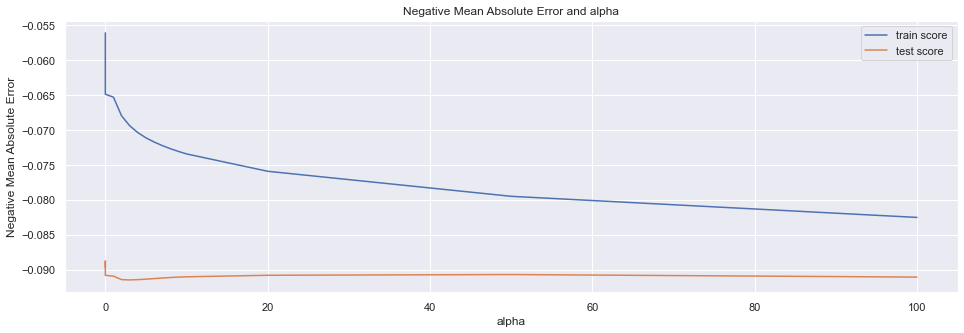

In [362]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [364]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 0.1
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-1.49144787e-02  4.63330096e-03  2.76081711e-02  5.80144817e-02
  3.76600691e-02  5.39421500e-02  2.37449275e-02  3.13634986e-04
  2.67139352e-02  8.91178879e-03  8.20675020e-03  3.83870166e-02
  4.56145278e-02  4.65142727e-02 -1.26676400e-04  7.21715791e-02
  1.55069600e-02  1.21100458e-03  6.25052285e-03  3.72995912e-03
  8.62668419e-03 -1.43371089e-02  4.74192187e-03  1.14559970e-02
 -2.30646908e-03  1.97024524e-02  1.89951934e-02  1.05126113e-02
  3.86701761e-03  6.37982512e-03  5.40823409e-03  8.71772775e-03
 -1.21502840e-03  2.12031430e-04  1.89590035e-04 -4.51498562e-03
 -3.32697033e-01  9.69909094e-02  9.64378720e-02  9.39129744e-02
  4.53552774e-02 -4.05184564e-02  4.05184564e-02  2.09343547e-03
  1.49381857e-02 -2.48230933e-02  7.79147216e-03 -1.65449343e-02
  2.04455032e-03  4.34483404e-04  1.40659006e-02  4.73579722e-02
 -4.73579722e-02  7.42253295e-03  4.20582873e-02 -3.11127147e-02
 -1.88233987e-02  4.55293125e-04  4.35336506e-02  6.76858096e-02
 -1.11219460e-01 -3.26108

In [365]:
#lets predict the R-squared value 
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9567977885731503


In [366]:
# Prediction on test set
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.877175599951036


In [367]:
# Printing the RMSE value
mean_squared_error(y_test, y_test_pred)

0.020209541096539465

the diff between r2 of train and test has improved and ridge has helped

## Lasso Regression

In [368]:
params = {'alpha': [0.00005, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}

lasso = Lasso()

# cross validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [5e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [369]:
cv_results_l = pd.DataFrame(lasso_cv.cv_results_)

In [370]:
# Printing the best hyperparameter alpha
print(lasso_cv.best_params_)
print(lasso_cv.best_score_)

{'alpha': 0.0001}
-0.08303673963420588


In [371]:
#Fitting Ridge model for alpha = 0.008 and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [372]:
#Predict the R-squared value for Train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9548740221370268


In [373]:
#Predict the R-squared value for test data

y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8760564343008108


In [374]:
mean_squared_error(y_test, y_test_pred)

0.02039368874304167

In [375]:
lasso.coef_

array([-1.78766734e-02,  7.38013792e-03,  2.09334331e-02,  6.01101336e-02,
        3.98778227e-02,  5.22002806e-02,  2.40402444e-02,  1.83145785e-03,
        2.12006557e-02,  7.07814437e-03, -0.00000000e+00,  4.67430921e-02,
        7.61686048e-02,  7.86327294e-02,  1.79890516e-03,  3.50682055e-02,
        1.62743111e-02,  1.61351504e-04,  5.84487964e-03,  3.79274623e-03,
        3.86936538e-03, -1.37396909e-02,  4.71678209e-03,  1.21628297e-02,
       -1.61766591e-03,  1.92963960e-02,  1.94090961e-02,  1.03294156e-02,
        6.09256949e-03,  5.12100988e-03,  4.33029690e-03,  7.61471288e-03,
        9.37128147e-05, -1.06642930e-03, -1.25543647e-03, -3.65741063e-03,
       -3.84573054e-01,  0.00000000e+00,  6.17632322e-05,  0.00000000e+00,
       -4.65561106e-02, -3.35335146e-02,  2.30929050e-15, -6.03677209e-04,
        2.44907120e-04, -2.98569869e-03,  3.95157487e-03, -2.12505201e-02,
       -1.55372260e-04,  5.84974273e-03,  3.31473330e-06,  0.00000000e+00,
       -0.00000000e+00,  

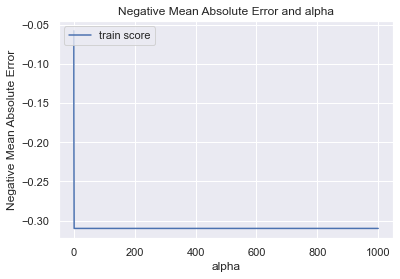

In [290]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results_l['param_alpha'], cv_results_l['mean_train_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

### Evaluating the Final Ridge Model

In [336]:
#alpha/lambda for ridge
print(model_cv.best_params_)

{'alpha': 0.1}


In [353]:
ridge = Ridge(alpha = 0.1)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.9567977885731503
0.877175599951036


In [354]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [355]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

Feaure       Coef
0          MSSubClass  11.244681
125  RoofMatl_Membran   0.436545
99    Condition2_PosA   0.359396
127     RoofMatl_Roll   0.318071
130  RoofMatl_WdShngl   0.311650
126    RoofMatl_Metal   0.308805
103   Condition2_RRNn   0.275951
122    RoofStyle_Shed   0.272274
124  RoofMatl_CompShg   0.261822
97   Condition2_Feedr   0.250725

In [356]:
# Ridge model parameters
model_parameters = list(sorted(ridge.coef_))
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.245),
 ('MSSubClass', -2.055),
 ('LotFrontage', -1.221),
 ('LotArea', -0.333),
 ('OverallQual', -0.319),
 ('OverallCond', -0.206),
 ('YearBuilt', -0.196),
 ('YearRemodAdd', -0.172),
 ('MasVnrArea', -0.128),
 ('BsmtFinSF1', -0.111),
 ('BsmtFinSF2', -0.108),
 ('BsmtUnfSF', -0.102),
 ('TotalBsmtSF', -0.097),
 ('1stFlrSF', -0.095),
 ('2ndFlrSF', -0.091),
 ('LowQualFinSF', -0.091),
 ('GrLivArea', -0.073),
 ('BsmtFullBath', -0.071),
 ('BsmtHalfBath', -0.071),
 ('FullBath', -0.065),
 ('HalfBath', -0.064),
 ('BedroomAbvGr', -0.064),
 ('KitchenAbvGr', -0.061),
 ('TotRmsAbvGrd', -0.058),
 ('Fireplaces', -0.058),
 ('GarageYrBlt', -0.057),
 ('GarageCars', -0.054),
 ('GarageArea', -0.054),
 ('WoodDeckSF', -0.053),
 ('OpenPorchSF', -0.053),
 ('EnclosedPorch', -0.052),
 ('3SsnPorch', -0.05),
 ('ScreenPorch', -0.05),
 ('PoolArea', -0.049),
 ('MiscVal', -0.047),
 ('MoSold', -0.047),
 ('YrSold', -0.047),
 ('MSZoning_C (all)', -0.046),
 ('MSZoning_FV', -0.046),
 ('MSZoning_RH', -0.044),


__The above features best explain the dataset for Ridge Regression Model__

### Evaluating the final Lasso Model

In [293]:
print(lasso_cv.best_params_)

{'alpha': 0.0001}


In [301]:
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9548740221370268
0.8760564343008108


In [303]:
model_parameter = list(lasso.coef_)
model_parameter.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
lasso_coef = pd.DataFrame(list(zip(cols,model_parameter)))
lasso_coef.columns = ['Feaure','Coef']

In [305]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

Feaure       Coef
0              MSSubClass  11.992313
268        SaleType_ConLD   0.181391
68   Neighborhood_Crawfor   0.139375
84   Neighborhood_StoneBr   0.096447
238        Functional_Typ   0.088250
14           LowQualFinSF   0.078633
13               2ndFlrSF   0.076169
134   Exterior1st_BrkFace   0.072906
66   Neighborhood_ClearCr   0.068025
83   Neighborhood_Somerst   0.060439

__The above features best explain the dataset for Lasso Regression Model__

In [318]:
lasso.coef_

array([-1.60417236e-02,  5.12145395e-03,  1.79146053e-02,  6.34741146e-02,
        4.13008211e-02,  4.77591270e-02,  2.30181479e-02,  1.89107696e-03,
        1.72323053e-02,  6.46509116e-03, -0.00000000e+00,  4.15178191e-02,
        7.41513819e-02,  7.81727672e-02,  1.93716253e-03,  3.67730322e-02,
        1.81619024e-02,  8.94796343e-04,  7.75222600e-03,  4.50980171e-03,
        3.07143858e-03, -1.36579724e-02,  6.97422566e-03,  1.30706902e-02,
       -2.34872648e-03,  2.23053946e-02,  1.76513333e-02,  1.06040983e-02,
        5.67558618e-03,  5.85312993e-03,  4.63211859e-03,  8.51144227e-03,
       -1.24400125e-03, -9.20461712e-04, -1.17745849e-03, -4.03579879e-03,
       -3.62961136e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -4.78971347e-02, -5.05872158e-03,  3.69207833e-16, -1.21288616e-03,
        0.00000000e+00, -0.00000000e+00,  1.93896638e-03, -2.48500698e-02,
       -0.00000000e+00,  6.90546083e-03,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  

In [319]:
model_parameter = list(lasso.coef_)
model_parameter.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
lasso_coef = pd.DataFrame(list(zip(cols,model_parameter)))
lasso_coef.columns = ['Feaure','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

Feaure       Coef
0              MSSubClass  11.924826
268        SaleType_ConLD   0.152409
68   Neighborhood_Crawfor   0.134708
84   Neighborhood_StoneBr   0.090545
238        Functional_Typ   0.082569
14           LowQualFinSF   0.078173
66   Neighborhood_ClearCr   0.075431
13               2ndFlrSF   0.074151
134   Exterior1st_BrkFace   0.065264
83   Neighborhood_Somerst   0.064766

### Inference

__The r2_score of ridge is slightly higher than lasso for the test dataset in our case.__

# Model Evaluation

In [345]:
ridge_pred = ridge.predict(X_test)

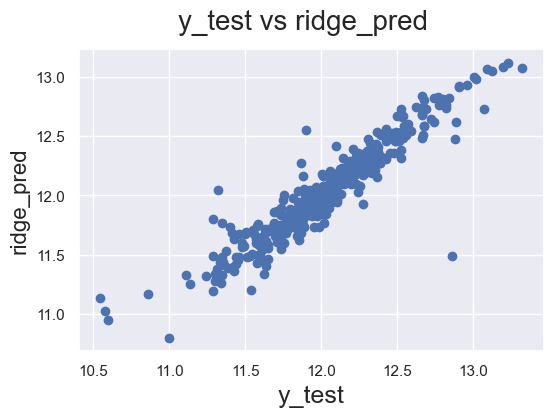

In [346]:
# Plotting y_test and y_pred to understand the spread for ridge regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,ridge_pred)
fig.suptitle('y_test vs ridge_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('ridge_pred', fontsize=16)  
plt.show()

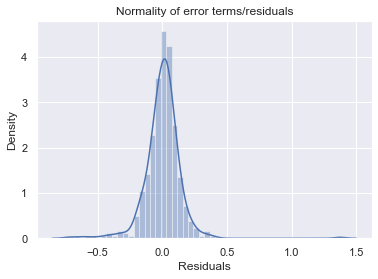

In [347]:
y_res=y_test-ridge_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

In [348]:
lasso_pred = lasso.predict(X_test)

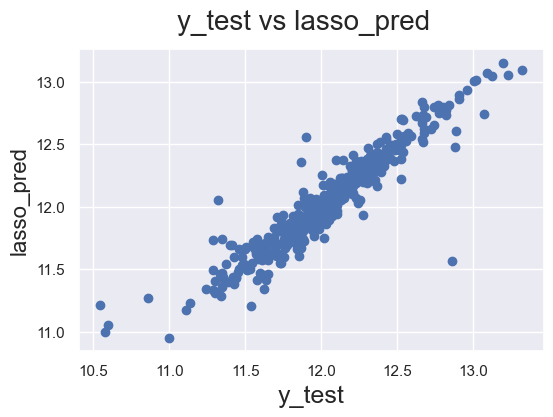

In [349]:
# Plotting y_test and y_pred to understand the spread for lasso regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,lasso_pred)
fig.suptitle('y_test vs lasso_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('lasso_pred', fontsize=16)  
plt.show()

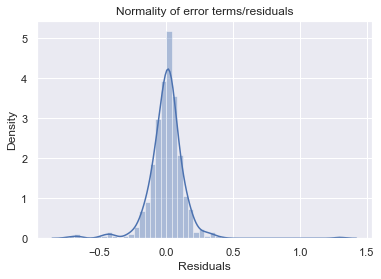

In [350]:
y_res=y_test-lasso_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

## Lets see the changes in the coefficients after regularization

In [351]:
betas = pd.DataFrame(index=X_train.columns)

In [352]:
betas.rows = X_train.columns

In [376]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [377]:
pd.set_option('display.max_rows', None)
betas.head(68)

Ridge         Lasso
MSSubClass           -0.014914 -1.787667e-02
LotFrontage           0.004633  7.380138e-03
LotArea               0.027608  2.093343e-02
OverallQual           0.058014  6.011013e-02
OverallCond           0.037660  3.987782e-02
YearBuilt             0.053942  5.220028e-02
YearRemodAdd          0.023745  2.404024e-02
MasVnrArea            0.000314  1.831458e-03
BsmtFinSF1            0.026714  2.120066e-02
BsmtFinSF2            0.008912  7.078144e-03
BsmtUnfSF             0.008207 -0.000000e+00
TotalBsmtSF           0.038387  4.674309e-02
1stFlrSF              0.045615  7.616860e-02
2ndFlrSF              0.046514  7.863273e-02
LowQualFinSF         -0.000127  1.798905e-03
GrLivArea             0.072172  3.506821e-02
BsmtFullBath          0.015507  1.627431e-02
BsmtHalfBath          0.001211  1.613515e-04
FullBath              0.006251  5.844880e-03
HalfBath              0.003730  3.792746e-03
BedroomAbvGr          0.008627  3.869365e-03
KitchenAbvGr         -0.014337 -1.373969e-02
TotRmsAbvGrd          0.004742  4.716782e-03
Fireplaces            0.011456  1.216283e-02
GarageYrBlt          -0.002306 -1.617666e-03
GarageCars            0.019702  1.929640e-02
GarageArea            0.018995  1.940910e-02
WoodDeckSF            0.010513  1.032942e-02
OpenPorchSF           0.003867  6.092569e-03
EnclosedPorch         0.006380  5.121010e-03
3SsnPorch             0.005408  4.330297e-03
ScreenPorch           0.008718  7.614713e-03
PoolArea             -0.001215  9.371281e-05
MiscVal               0.000212 -1.066429e-03
MoSold                0.000190 -1.255436e-03
YrSold               -0.004515 -3.657411e-03
MSZoning_C (all)     -0.332697 -3.845731e-01
MSZoning_FV           0.096991  0.000000e+00
MSZoning_RH           0.096438  6.176323e-05
MSZoning_RL           0.093913  0.000000e+00
MSZoning_RM           0.045355 -4.655611e-02
Street_Grvl          -0.040518 -3.353351e-02
Street_Pave           0.040518  2.309291e-15
LotShape_IR1          0.002093 -6.036772e-04
LotShape_IR2          0.014938  2.449071e-04
LotShape_IR3         -0.024823 -2.985699e-03
LotShape_Reg          0.007791  3.951575e-03
LandContour_Bnk      -0.016545 -2.125052e-02
LandContour_HLS       0.002045 -1.553723e-04
LandContour_Low       0.000434  5.849743e-03
LandContour_Lvl       0.014066  3.314733e-06
Utilities_AllPub      0.047358  0.000000e+00
Utilities_NoSeWa     -0.047358 -0.000000e+00
LotConfig_Corner      0.007423  1.765778e-03
LotConfig_CulDSac     0.042058  3.963103e-02
LotConfig_FR2        -0.031113 -2.606042e-02
LotConfig_FR3        -0.018823 -0.000000e+00
LotConfig_Inside      0.000455 -0.000000e+00
LandSlope_Gtl         0.043534  0.000000e+00
LandSlope_Mod         0.067686  8.333078e-03
LandSlope_Sev        -0.111219 -7.076919e-02
Neighborhood_Blmngtn -0.032611 -8.151997e-03
Neighborhood_Blueste  0.015837  0.000000e+00
Neighborhood_BrDale  -0.064135 -4.085048e-02
Neighborhood_BrkSide  0.039344  3.810112e-02
Neighborhood_ClearCr  0.038280  6.802486e-02
Neighborhood_CollgCr -0.017585 -2.870046e-03
Neighborhood_Crawfor  0.134647  1.393751e-01

## Q1-Which variables are significant in predicting the price of a house?

- LotFrontage
- LotArea
- OverallQual
- OverallCond
- YearBuilt
- YearRemodAdd
- MasVnrArea
- BsmtFinSF1
- BsmtFinSF2
- TotalBsmtSF

## Q2 -How well those variables describe the price of a house

Best alpha value for Lasso : {'alpha': 0.0001}
Best alpha value for Ridge : {'alpha': 0.1}


Ridge: the R2 score of test: 0.877
Lasso: the R2 score of test: 0.876

# Conclusion

The Simple OLS model performs reasonably well on training dataset. It does not necessarily perform well, however, against data that it has not seen.

A regularized model penalizes model complexity by limiting the size of the betas. In other words, it prevents us from overfitting and is better able to generalize to new data.

Though the model performance by Ridge Regression was better in terms of R2 values of Train and Test,
it is better to use Lasso, since it brings and assigns a zero value to insignificant features, enabling us to choose
the predictive variables.
It is always advisable to use simple yet robust model.

# Problem Statement - Part II

## Question 1
What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the  model if you choose double the value of alpha for both ridge and lasso? What will be the most  important predictor variables after the change is implemented?

### Ridge - upon doubling, alpha=0.2

In [384]:

ridge2 = Ridge(alpha = 0.2)
ridge2.fit(X_train,y_train)

y_pred_train = ridge2.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge2.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.954782461208471
0.8831228509329014


R square of training data has decrease and it has increase on testing data

### Lasso - upon doubling, alpha=0.0002

In [385]:

lasso2 = Lasso(alpha=0.0002)
lasso2.fit(X_train,y_train)

y_train_pred = lasso2.predict(X_train)
y_test_pred = lasso2.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9519235144389346
0.881828103113388


R square of training data has decrease and it has increase on testing data

In [390]:
#important predictor variables
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Ridge2'] = ridge2.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas['Lasso2'] = lasso2.coef_
pd.set_option('display.max_rows', None)
betas.head(68)

Ridge2     Ridge         Lasso        Lasso2
MSSubClass           -0.016582 -0.016582 -1.787667e-02 -1.604172e-02
LotFrontage           0.002232  0.002232  7.380138e-03  5.121454e-03
LotArea               0.025214  0.025214  2.093343e-02  1.791461e-02
OverallQual           0.059849  0.059849  6.011013e-02  6.347411e-02
OverallCond           0.036540  0.036540  3.987782e-02  4.130082e-02
YearBuilt             0.048832  0.048832  5.220028e-02  4.775913e-02
YearRemodAdd          0.023335  0.023335  2.404024e-02  2.301815e-02
MasVnrArea           -0.000132 -0.000132  1.831458e-03  1.891077e-03
BsmtFinSF1            0.020943  0.020943  2.120066e-02  1.723231e-02
BsmtFinSF2            0.008037  0.008037  7.078144e-03  6.465091e-03
BsmtUnfSF             0.007589  0.007589 -0.000000e+00 -0.000000e+00
TotalBsmtSF           0.031614  0.031614  4.674309e-02  4.151782e-02
1stFlrSF              0.045106  0.045106  7.616860e-02  7.415138e-02
2ndFlrSF              0.045425  0.045425  7.863273e-02  7.817277e-02
LowQualFinSF          0.000358  0.000358  1.798905e-03  1.937163e-03
GrLivArea             0.070944  0.070944  3.506821e-02  3.677303e-02
BsmtFullBath          0.017474  0.017474  1.627431e-02  1.816190e-02
BsmtHalfBath          0.001765  0.001765  1.613515e-04  8.947963e-04
FullBath              0.007869  0.007869  5.844880e-03  7.752226e-03
HalfBath              0.004438  0.004438  3.792746e-03  4.509802e-03
BedroomAbvGr          0.009528  0.009528  3.869365e-03  3.071439e-03
KitchenAbvGr         -0.014076 -0.014076 -1.373969e-02 -1.365797e-02
TotRmsAbvGrd          0.005990  0.005990  4.716782e-03  6.974226e-03
Fireplaces            0.012207  0.012207  1.216283e-02  1.307069e-02
GarageYrBlt          -0.003621 -0.003621 -1.617666e-03 -2.348726e-03
GarageCars            0.024038  0.024038  1.929640e-02  2.230539e-02
GarageArea            0.016439  0.016439  1.940910e-02  1.765133e-02
WoodDeckSF            0.010637  0.010637  1.032942e-02  1.060410e-02
OpenPorchSF           0.003351  0.003351  6.092569e-03  5.675586e-03
EnclosedPorch         0.006945  0.006945  5.121010e-03  5.853130e-03
3SsnPorch             0.005932  0.005932  4.330297e-03  4.632119e-03
ScreenPorch           0.009058  0.009058  7.614713e-03  8.511442e-03
PoolArea             -0.003100 -0.003100  9.371281e-05 -1.244001e-03
MiscVal              -0.000078 -0.000078 -1.066429e-03 -9.204617e-04
MoSold               -0.000071 -0.000071 -1.255436e-03 -1.177458e-03
YrSold               -0.004527 -0.004527 -3.657411e-03 -4.035799e-03
MSZoning_C (all)     -0.327341 -0.327341 -3.845731e-01 -3.629611e-01
MSZoning_FV           0.093312  0.093312  0.000000e+00  0.000000e+00
MSZoning_RH           0.094836  0.094836  6.176323e-05  0.000000e+00
MSZoning_RL           0.092842  0.092842  0.000000e+00  0.000000e+00
MSZoning_RM           0.046352  0.046352 -4.655611e-02 -4.789713e-02
Street_Grvl          -0.038261 -0.038261 -3.353351e-02 -5.058722e-03
Street_Pave           0.038261  0.038261  2.309291e-15  3.692078e-16
LotShape_IR1          0.004471  0.004471 -6.036772e-04 -1.212886e-03
LotShape_IR2          0.017916  0.017916  2.449071e-04  0.000000e+00
LotShape_IR3         -0.032897 -0.032897 -2.985699e-03 -0.000000e+00
LotShape_Reg          0.010510  0.010510  3.951575e-03  1.938966e-03
LandContour_Bnk      -0.025239 -0.025239 -2.125052e-02 -2.485007e-02
LandContour_HLS       0.003245  0.003245 -1.553723e-04 -0.000000e+00
LandContour_Low       0.007971  0.007971  5.849743e-03  6.905461e-03
LandContour_Lvl       0.014022  0.014022  3.314733e-06  0.000000e+00
Utilities_AllPub      0.053654  0.053654  0.000000e+00  0.000000e+00
Utilities_NoSeWa     -0.053654 -0.053654 -0.000000e+00 -0.000000e+00
LotConfig_Corner      0.009453  0.009453  1.765778e-03  1.641375e-03
LotConfig_CulDSac     0.045037  0.045037  3.963103e-02  3.899771e-02
LotConfig_FR2        -0.032434 -0.032434 -2.606042e-02 -2.160565e-02
LotConfig_FR3        -0.023265 -0.023265 -0.000000e+00 -0.000000e+00
LotConfig_Inside      

Predictors are same but the coefficent of these predictor has changed

- LotFrontage
- LotArea
- OverallQual
- OverallCond
- YearBuilt
- YearRemodAdd
- MasVnrArea
- BsmtFinSF1
- TotalBsmtSF
- GarageArea
- GarageCars

## Question 3


After building the model, you realized that the five most important predictor variables in the lasso  model are not available in the incoming data. You will now have to create another model excluding  the five most important predictor variables. Which are the five most important predictor variables  now?


In [392]:
X_train.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=279)

In [394]:
X_train1 = X_train.drop(['LotArea','OverallQual','YearBuilt','BsmtFinSF1','TotalBsmtSF'],axis=1)
X_test1 = X_test.drop(['LotArea','OverallQual','YearBuilt','BsmtFinSF1','TotalBsmtSF'],axis=1)

In [395]:
X_train1.head()

MSSubClass  LotFrontage  OverallCond  YearRemodAdd  MasVnrArea  \
210    -0.657071    -0.115302     0.383154     -1.694350   -0.558025   
318     0.035976     0.926898    -0.533005      0.390956    0.809137   
239    -0.195040    -0.794998    -1.449164     -1.694350   -0.558025   
986    -0.195040    -0.477806     2.215472      0.875911   -0.558025   
1416    3.039179    -0.432493     0.383154     -1.694350   -0.558025   

      BsmtFinSF2  BsmtUnfSF  1stFlrSF  2ndFlrSF  LowQualFinSF  ...  \
210    -0.293313  -0.374367 -0.765065 -0.787597     -0.124502  ...   
318    -0.293313  -0.454644  0.511914  2.140556     -0.124502  ...   
239    -0.293313   0.171964 -0.930972  0.795996     -0.124502  ...   
986    -0.293313  -0.175904 -0.420683  0.669584     -0.124502  ...   
1416   -0.293313   0.475233  0.195183  1.611926     -0.124502  ...   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
210                0             0             0            1   
318                0             0             0            1   
239                0             0             0            1   
986                0             0             0            1   
1416               0             0             0            1   

      SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
210                       0                      0                     0   
318                       0                      0                     0   
239                       0                      0                     0   
986                       0                      0                     0   
1416                      0                      0                     0   

      SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
210                      0                     1                      0  
318                      0                     1                      0  
239                      0                     1                      0  
986                      0                     1                      0  
1416                     0                     1                      0  

[5 rows x 274 columns]

In [396]:
X_test1.head()

MSSubClass  LotFrontage  OverallCond  YearRemodAdd  MasVnrArea  \
1436   -0.888086    -0.432493     0.383154     -0.675945   -0.558025   
57      0.035976     0.881585    -0.533005      0.924407   -0.558025   
780    -0.888086    -0.296554    -0.533005      0.536443   -0.355087   
382     0.035976     0.428455    -0.533005      1.021398   -0.558025   
1170    0.498007     0.292515     0.383154     -0.384972   -0.558025   

      BsmtFinSF2  BsmtUnfSF  1stFlrSF  2ndFlrSF  LowQualFinSF  ...  \
1436   -0.293313  -0.704396 -0.765065 -0.787597     -0.124502  ...   
57     -0.293313   0.660317 -0.775120  1.189021     -0.124502  ...   
780    -0.293313   1.500998  0.212779 -0.787597     -0.124502  ...   
382    -0.293313   0.836481 -0.576535  1.184425     -0.124502  ...   
1170   -0.293313   0.022559 -0.126576 -0.787597     -0.124502  ...   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
1436               0             0             0            1   
57                 0             0             0            1   
780                0             0             0            1   
382                0             0             0            1   
1170               0             0             0            1   

      SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
1436                      0                      0                     0   
57                        0                      0                     0   
780                       0                      0                     0   
382                       0                      0                     0   
1170                      0                      0                     0   

      SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
1436                     0                     1                      0  
57                       0                     1                      0  
780                      0                     1                      0  
382                      0                     1                      0  
1170                     0                     1                      0  

[5 rows x 274 columns]

In [398]:
ridge3 = Ridge(alpha = 0.1)
ridge3.fit(X_train1,y_train)

y_pred_train = ridge3.predict(X_train1)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge3.predict(X_test1)
print(r2_score(y_test,y_pred_test))

0.9474413066794776
0.8658050765103419


R2score of training and testing data has decreased

In [401]:
#important predictor variables
betas = pd.DataFrame(index=X_train1.columns)
betas.rows = X_train.columns
betas['Ridge3'] = ridge3.coef_
pd.set_option('display.max_rows', None)
betas.head(68)

Ridge3
MSSubClass           -0.026979
LotFrontage           0.006413
OverallCond           0.033467
YearRemodAdd          0.023564
MasVnrArea            0.004776
BsmtFinSF2            0.001995
BsmtUnfSF             0.002140
1stFlrSF              0.080954
2ndFlrSF              0.033498
LowQualFinSF         -0.001226
GrLivArea             0.087860
BsmtFullBath          0.021848
BsmtHalfBath          0.001723
FullBath              0.011904
HalfBath              0.004461
BedroomAbvGr          0.009141
KitchenAbvGr         -0.014476
TotRmsAbvGrd          0.001757
Fireplaces            0.015694
GarageYrBlt           0.001191
GarageCars            0.016693
GarageArea            0.023877
WoodDeckSF            0.010057
OpenPorchSF           0.006282
EnclosedPorch         0.003232
3SsnPorch             0.005569
ScreenPorch           0.008613
PoolArea              0.000937
MiscVal               0.003304
MoSold                0.001757
YrSold               -0.003279
MSZoning_C (all)     -0.377261
MSZoning_FV           0.102846
MSZoning_RH           0.107592
MSZoning_RL           0.102880
MSZoning_RM           0.063942
Street_Grvl           0.025903
Street_Pave          -0.025903
LotShape_IR1         -0.013999
LotShape_IR2          0.005858
LotShape_IR3          0.016878
LotShape_Reg         -0.008737
LandContour_Bnk      -0.034521
LandContour_HLS      -0.001186
LandContour_Low       0.033387
LandContour_Lvl       0.002320
Utilities_AllPub      0.087323
Utilities_NoSeWa     -0.087323
LotConfig_Corner      0.007006
LotConfig_CulDSac     0.047534
LotConfig_FR2        -0.030071
LotConfig_FR3        -0.024560
LotConfig_Inside      0.000090
LandSlope_Gtl         0.018191
LandSlope_Mod         0.017448
LandSlope_Sev        -0.035639
Neighborhood_Blmngtn -0.016886
Neighborhood_Blueste  0.002321
Neighborhood_BrDale  -0.045319
Neighborhood_BrkSide -0.003141
Neighborhood_ClearCr  0.057322
Neighborhood_CollgCr  0.000913
Neighborhood_Crawfor  0.120206
Neighborhood_Edwards -0.101033
Neighborhood_Gilbert  0.000156
Neighborhood_IDOTRR  -0.044618
Neighborhood_MeadowV -0.261638
Neighborhood_Mitchel -0.034715

Now the five most important predictor variables are

- LotFrontage	0.006413
- OverallCond	0.033467
- YearRemodAdd	0.023564
- MasVnrArea	0.004776
- BsmtFinSF2	0.001995
- BsmtUnfSF	0.002140